In [1]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

**Question 1: [Macro] Average growth of GDP in 2023**

What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [ ]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=24
Period for indexes: 1954-04-24 to 2024-04-24 


In [ ]:
# Real Gross Domestic Product (GDPC1)
# https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start, end)

In [ ]:
gdpc1

,GDPC1
DATE,
1954-07-01,2880.482
1954-10-01,2936.852
1955-01-01,3020.746
1955-04-01,3069.910
1955-07-01,3111.379
...,...
2022-10-01,21989.981
2023-01-01,22112.329
2023-04-01,22225.350


In [ ]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1.tail()

,GDPC1,gdpc1_us_yoy
DATE,,
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


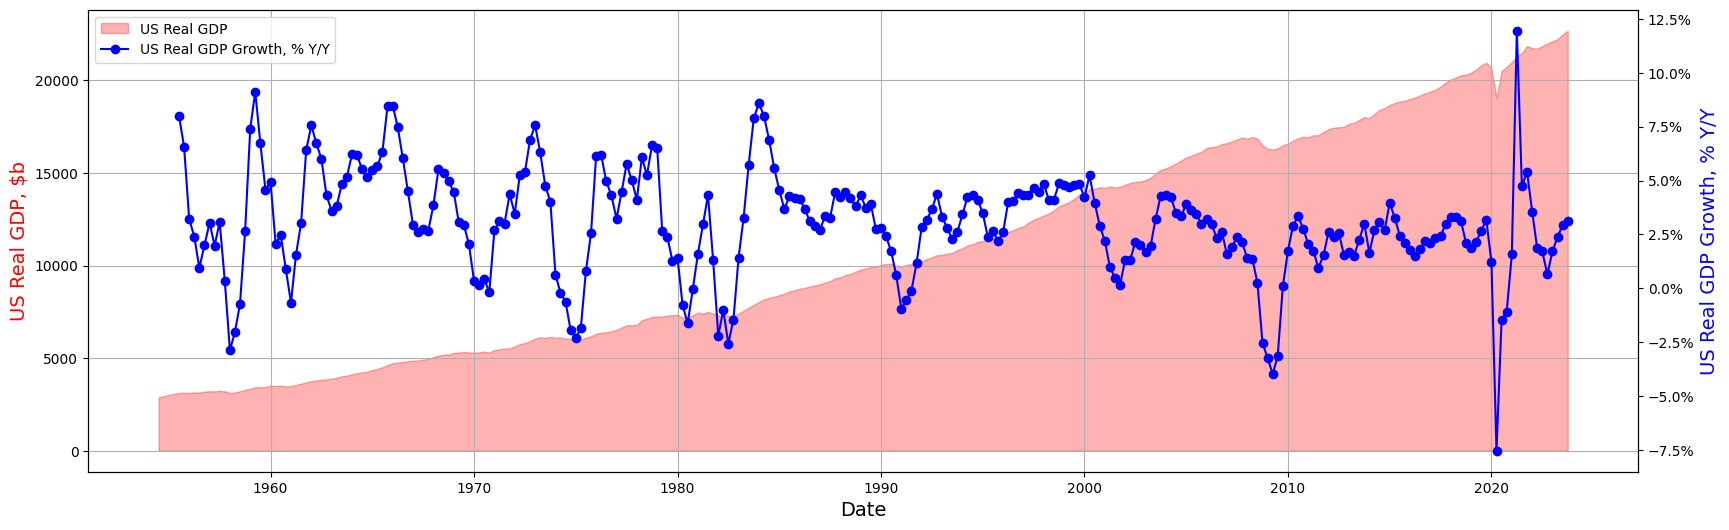

In [ ]:
# Visuals GDPC1
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US Real GDP curve
ax.fill_between(gdpc1.index, gdpc1.GDPC1, color="red", alpha=0.3, label="US Real GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdpc1.gdpc1_us_yoy, color="blue", marker="o", label="US Real GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Real GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Real GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [ ]:
# Filter data for the year 2023
gdpc1_2023 = gdpc1.loc['2023-01-01':'2023-12-31']

# Average YoY growth rate in 2023
average_growth_2023 = gdpc1_2023['gdpc1_us_yoy'].mean()
print("Average YoY growth rate in 2023:", average_growth_2023)

average_growth_2023_percentage = average_growth_2023 * 100
print("Average YoY growth rate in 2023:", "{:.1f}%".format(average_growth_2023_percentage))

Average YoY growth rate in 2023: 0.02540443392867625
Average YoY growth rate in 2023: 2.5%


**Question 2. [Macro] Inverse "Treasury Yield"**

Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [ ]:
start_date = "2000-01-01"
end_date = "2024-04-24"

In [ ]:
# https://fred.stlouisfed.org/series/DGS2
dgs2 = pdr.DataReader("DGS2", "fred", start_date, end_date)
print(dgs2)
dgs10 = pdr.DataReader("DGS10", "fred", start_date, end_date)
print(dgs10)

            DGS2
DATE            
2000-01-03  6.38
2000-01-04  6.30
2000-01-05  6.38
2000-01-06  6.35
2000-01-07  6.31
...          ...
2024-04-16  4.97
2024-04-17  4.93
2024-04-18  4.98
2024-04-19  4.97
2024-04-22  4.97

[6341 rows x 1 columns]
            DGS10
DATE             
2000-01-03   6.58
2000-01-04   6.49
2000-01-05   6.62
2000-01-06   6.57
2000-01-07   6.52
...           ...
2024-04-16   4.67
2024-04-17   4.59
2024-04-18   4.64
2024-04-19   4.62
2024-04-22   4.62

[6341 rows x 1 columns]


In [ ]:
dgs_2_10 = pd.merge(dgs2, dgs10, on='DATE')
dgs_2_10['Difference'] = dgs_2_10.DGS10 - dgs_2_10.DGS2
print(dgs_2_10)

            DGS2  DGS10  Difference
DATE                               
2000-01-03  6.38   6.58        0.20
2000-01-04  6.30   6.49        0.19
2000-01-05  6.38   6.62        0.24
2000-01-06  6.35   6.57        0.22
2000-01-07  6.31   6.52        0.21
...          ...    ...         ...
2024-04-16  4.97   4.67       -0.30
2024-04-17  4.93   4.59       -0.34
2024-04-18  4.98   4.64       -0.34
2024-04-19  4.97   4.62       -0.35
2024-04-22  4.97   4.62       -0.35

[6341 rows x 3 columns]


In [ ]:
# Find min value of (dgs10-dgs2) after since year 2000 (2000-01-01)
min_value = dgs_2_10.loc[dgs_2_10['Difference'].idxmin()].round(1)
print(min_value)

DGS2          4.9
DGS10         3.9
Difference   -1.1
Name: 2023-07-03 00:00:00, dtype: float64


Inverted yield curve is an indicator for a possible economic recession.

This has been in-line with a market of interest like Germany Stock Market Index (DE40).

Investors need to monitor the changes in the curve and take right decisions regarding their portfolio and investments.

Certainly, Inverted yield curve can be a good predictive feature for the models but its implementation is not that straight-forward as many unpredictable factors can influence it.

**Question 3. [Index] Which Index is better recently?**

Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 1.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [ ]:
end_date = "2024-04-09"
start_date = "2019-04-09"

In [ ]:
# S&P 500 ^GSPC https://finance.yahoo.com/quote/%5EGSPC/
spc_index = yf.download('^GSPC', start_date, end_date)
spc_index

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,2886.580078,2886.879883,2873.330078,2878.199951,2878.199951,3032480000
2019-04-10,2881.370117,2889.709961,2879.129883,2888.209961,2888.209961,3092230000
2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000
2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000
2019-04-15,2908.320068,2909.600098,2896.479980,2905.580078,2905.580078,3114530000
...,...,...,...,...,...,...
2024-04-02,5204.290039,5208.339844,5184.049805,5205.810059,5205.810059,3886590000
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000


In [ ]:
# IPC Mexico ^MXX, https://finance.yahoo.com/quote/%5EMXX/
mxx_index = yf.download('^MXX', start_date, end_date)
mxx_index

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,45346.828125,45346.828125,44854.531250,45151.628906,45151.628906,191575000
2019-04-10,45204.750000,45219.410156,44850.109375,44909.140625,44909.140625,145314900
2019-04-11,44872.531250,44966.500000,44373.488281,44580.058594,44580.058594,109090000
2019-04-12,44767.671875,44888.699219,44534.378906,44686.058594,44686.058594,143662400
2019-04-15,44649.738281,44900.929688,44347.531250,44625.781250,44625.781250,108627100
...,...,...,...,...,...,...
2024-04-02,57593.621094,57830.878906,57235.589844,57581.808594,57581.808594,180753600
2024-04-03,57547.191406,58086.421875,57300.109375,57503.390625,57503.390625,189285300
2024-04-04,57539.468750,58219.500000,57514.179688,57882.761719,57882.761719,184739700


In [ ]:
# Calculate growth for S&P 500
spc_index_initial = spc_index['Close'].iloc[0]
spc_index_final = spc_index['Close'].iloc[-1]
spc_index_growth = ((spc_index_final / spc_index_initial) - 1) * 100
print("S&P 500:", spc_index_growth)

# Calculate growth for IPC Mexico
mxx_index_initial = mxx_index['Close'].iloc[0]
mxx_index_final = mxx_index['Close'].iloc[-1]
mxx_index_growth = ((mxx_index_final / mxx_index_initial) - 1) * 100
print("IPC Mexico:", mxx_index_growth)

S&P 500: 80.75151917783086
IPC Mexico: 28.43377484045295


It can be seen that the higher growing index is S&P 500 and value is 81.

**Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks**

Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [ ]:
end_date = "2023-12-31"
start_date = "2023-01-01"

In [ ]:
sr_daily = yf.download('2222.SR', start_date, end_date)
sr_daily.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,29.227272,29.454544,29.181818,29.454544,28.475794,1569087
2023-01-02,29.545454,29.545454,29.227272,29.227272,28.256075,4693364
2023-01-03,29.227272,29.227272,29.227272,29.227272,28.256075,0
2023-01-04,29.181818,29.227272,28.681818,28.818180,27.860575,4618455
2023-01-05,28.818180,28.818180,28.363636,28.681818,27.728745,4797670


In [ ]:
brkb_daily = yf.download('BRK-B', start_date, end_date)
brkb_daily.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,310.070007,312.390015,307.380005,309.910004,309.910004,3549900
2023-01-04,312.000000,316.890015,311.250000,314.549988,314.549988,5121200
2023-01-05,313.570007,314.230011,310.000000,312.899994,312.899994,3416300
2023-01-06,315.000000,320.160004,313.380005,318.690002,318.690002,3647900
2023-01-09,319.019989,320.500000,314.750000,315.529999,315.529999,4397400


In [ ]:
aapl_daily = yf.download('AAPL', start_date, end_date)
aapl_daily.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216293,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166649,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735245,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800


In [ ]:
msft_daily = yf.download('MSFT', start_date, end_date)
msft_daily.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,237.035995,25740000
2023-01-04,232.279999,232.869995,225.960007,229.100006,226.667297,50623400
2023-01-05,227.199997,227.550003,221.759995,222.309998,219.949387,39585600
2023-01-06,223.000000,225.759995,219.350006,224.929993,222.541550,43613600
2023-01-09,226.449997,231.240005,226.410004,227.119995,224.708298,27369800


In [ ]:
goog_daily = yf.download('GOOG', start_date, end_date)
goog_daily.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700


In [ ]:
jpm_daily = yf.download('JPM', start_date, end_date)
jpm_daily.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,135.240005,136.740005,133.889999,135.119995,129.648514,11054800
2023-01-04,135.990005,137.679993,135.570007,136.380005,130.857468,11687600
2023-01-05,135.660004,135.710007,133.699997,135.350006,130.828491,8381300
2023-01-06,136.130005,138.380005,134.490005,137.940002,133.331955,10029100
2023-01-09,138.600006,138.880005,136.880005,137.369995,132.780991,8482300


In [ ]:
# Calculate 52 weeks range ratio for these stocks
#largest range ratio [=(max-min)/max]
sr_range_ratio = ((sr_daily['Adj Close'].max() - sr_daily['Adj Close'].min()) /sr_daily['Adj Close'].max()).round(2)
print("Saudi Aramco", sr_range_ratio)

brkb_range_ratio = ((brkb_daily['Adj Close'].max() - brkb_daily['Adj Close'].min()) /brkb_daily['Adj Close'].max()).round(2)
print("Berkshire Hathaway", brkb_range_ratio)

aapl_range_ratio = ((aapl_daily['Adj Close'].max() - aapl_daily['Adj Close'].min()) /aapl_daily['Adj Close'].max()).round(2)
print("Apple", aapl_range_ratio)

msft_range_ratio = ((msft_daily['Adj Close'].max() - msft_daily['Adj Close'].min()) /msft_daily['Adj Close'].max()).round(2)
print("Microsoft", msft_range_ratio)

goog_range_ratio = ((goog_daily['Adj Close'].max() - goog_daily['Adj Close'].min()) /goog_daily['Adj Close'].max()).round(2)
print("Google", goog_range_ratio)

jpm_range_ratio = ((jpm_daily['Adj Close'].max() - jpm_daily['Adj Close'].min()) /jpm_daily['Adj Close'].max()).round(2)
print("JP Morgan Chase", jpm_range_ratio)

Saudi Aramco 0.21
Berkshire Hathaway 0.21
Apple 0.37
Microsoft 0.42
Google 0.39
JP Morgan Chase 0.28


It can be seen that the largest range ratio is 0.42 which is for Microsoft.

This metric calculation can be useful for the research to understand the volatility of certain stocks in the market. There can be several factors for the high largest range ratio which is an indication of high fluctations in price of stock. So, this analysis can be conducted to maximise profits in some cases through investing in highly volatile stock. Similarly, to minimise losses by investing in stocks that do not fluctate a lot and have stable price range.